In [40]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# 读取数据
df = pd.read_csv('盤後調整價.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(columns=['Date'], axis=1, inplace=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\2254294274.py:7: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


In [42]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000
2024-09-20,32.3000,45.0000,17.4500,30.6500,14.8500,18.6000,21.7500,18.1000,50.4000,51.2000,...,160.5000,30.6500,143.0000,115.0000,82.5000,20.2500,47.5000,30.9000,36.30,241.5000
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

In [46]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [70]:
# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

In [72]:
df

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [74]:
# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


In [76]:
df_filtered

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [78]:
# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\3690790798.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_11864\3690790798.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


In [80]:
df_filtered

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-09-20,17.9792,17.0514,6.3412,14.7936,6.8099,7.2449,14.5635,15.6389,16.4036,15.9253,...,32.7179,16.1726,29.0404,57.4138,35.1680,19.2550,12.9373,6.6965,17.55,8.6595
2016-09-21,17.9792,16.9869,6.3484,14.8243,6.8321,7.2449,14.5162,15.5118,16.4416,15.8660,...,32.7867,16.1726,29.2862,56.7547,35.3109,19.5062,12.9545,6.6965,17.55,8.6422
2016-09-22,19.0735,17.8250,6.3984,14.9164,6.8617,7.3159,14.6580,15.4694,16.5935,16.2515,...,32.8555,16.6600,29.2043,56.9524,35.2394,19.4225,13.4368,6.8421,18.00,8.6682
2016-09-23,18.6827,17.7283,6.4126,14.9164,6.8617,7.3159,14.7053,15.4270,16.6315,16.4294,...,33.1651,16.3733,29.0814,57.2161,35.2394,19.6318,13.2818,6.7547,17.95,8.7637
2016-09-26,18.6566,17.6638,6.3841,14.8857,6.8321,7.2804,14.6107,15.3423,16.7074,16.2812,...,33.0963,16.2873,29.0814,56.6888,35.2394,20.2597,13.3679,6.7547,18.00,8.6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13,31.8000,44.9000,17.7000,29.8000,14.6000,18.4500,22.2500,18.1500,48.8000,50.9000,...,162.5000,30.8500,134.5000,114.5000,81.6000,20.1000,46.9500,32.2000,37.00,209.5000
2024-09-16,32.2000,45.0000,17.9500,30.2000,14.7500,18.5500,22.4000,18.2500,48.8000,51.3000,...,161.5000,30.9000,136.0000,114.5000,81.6000,20.2000,47.2000,31.9000,36.90,206.5000
2024-09-18,32.1000,44.8000,18.0000,30.3500,14.8000,18.4500,22.3000,18.2000,49.7500,51.4000,...,159.5000,30.8000,137.5000,115.0000,81.7000,20.2000,47.4500,32.1500,36.45,213.5000
2024-09-19,32.2000,44.9500,18.1000,30.4500,14.9500,18.5500,22.3500,18.1500,50.3000,51.3000,...,160.0000,31.4000,141.0000,114.0000,82.4000,20.2000,49.2500,33.0000,35.95,234.5000


In [82]:
# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else: 
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)
    
    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)
    
    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

In [38]:
non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}
print("持仓不为零的股票及其权重：")
for stock, weight in non_zero_weights.items():
    print(f"{stock}: {weight:.4f}")


持仓不为零的股票及其权重：
1231: 0.0877
1235: 0.0705
1341: 0.0041
1423: 0.0671
1435: 0.0144
1436: 0.0825
1438: 0.0048
1443: 0.0247
1519: 0.0162
1540: 0.0061
1615: 0.0271
1713: 0.0007
2404: 0.0014
2467: 0.0326
2480: 0.0206
2539: 0.1242
2540: 0.0177
2543: 0.0046
2546: 0.0531
2548: 0.0030
2597: 0.0229
3130: 0.0016
3528: 0.0021
3533: 0.0101
3653: 0.0031
3661: 0.0205
3715: 0.0074
4569: 0.1077
4583: 0.0138
4763: 0.0058
6183: 0.0119
6409: 0.0144
6472: 0.0328
6655: 0.0437
6805: 0.0164
8467: 0.0052
9103: 0.0019
9937: 0.0066
9958: 0.0163


In [1]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else:
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)

    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()

    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)

    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:7: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')


以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\3383169869.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='bfill', inplace=True)


OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08772, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0705, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00412, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0671, '1432': 0.0, '1434': 0.0, '1435': 0.01439, '1436': 0.08248, '1437': 0.0, '1438': 0.00478, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.02469, '1444': 

C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [86]:
pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB 660.6 kB/s eta 0:00:27
   ---------------------------------------- 0.1/17.7 MB 653.6 kB/s eta 0:00:27
   ---------------------------------------- 0.2/17.7 MB 1.0 MB/s eta 0:00:18
    --------------------------------------- 0.3/17.7 MB 1.4 MB/s eta 0:00:13
   - -------------------------------------- 0.5/17.7 MB 2.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/17.7 MB 2.0 MB/s eta 0:00:09
   - -------------------------------------- 0.7/17.7 MB 2.0 MB/s eta 0:00:09
   -- ------------------------------------- 1.0/17.7 MB 2.8 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/17.7 MB 3.2 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/17.7 MB 3.2 MB/s eta 0:00:06
   ---- ----------------------------------- 1.8/17.7 MB 3.5 MB/s eta 0:00:05
   ---- -

In [90]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
porfolio_val = 150000
lastest_prices = get_latest_prices(df_filtered)
weights = cleaned_weights
da = DiscreteAllocation(weights, lastest_prices, total_portfolio_value = porfolio_val)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds Remaining: $', leftover )

Discrete allocation: {'1231': 120, '1235': 78, '1341': 9, '1423': 224, '1435': 47, '1436': 87, '1438': 11, '1443': 115, '1519': 4, '1540': 20, '1615': 63, '1713': 2, '2404': 1, '2467': 22, '2480': 25, '2539': 346, '2540': 23, '2543': 9, '2546': 107, '2548': 4, '2597': 24, '3130': 1, '3528': 6, '3533': 1, '3661': 3, '3715': 16, '4569': 65, '4583': 3, '4763': 1, '6183': 24, '6409': 2, '6472': 6, '6655': 48, '6805': 3, '8467': 3, '9103': 43, '9937': 15, '9958': 10}
Funds Remaining: $ 18.92104000467225


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:10: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\1618565989.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64


C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
[*********************100%***********************]  1 of 1 completed

OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.08772, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0705, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00412, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0671, '1432': 0.0, '1434': 0.0, '1435': 0.01439, '1436': 0.08248, '1437': 0.0, '1438': 0.00478, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, '1443': 0.02469, '1444': 

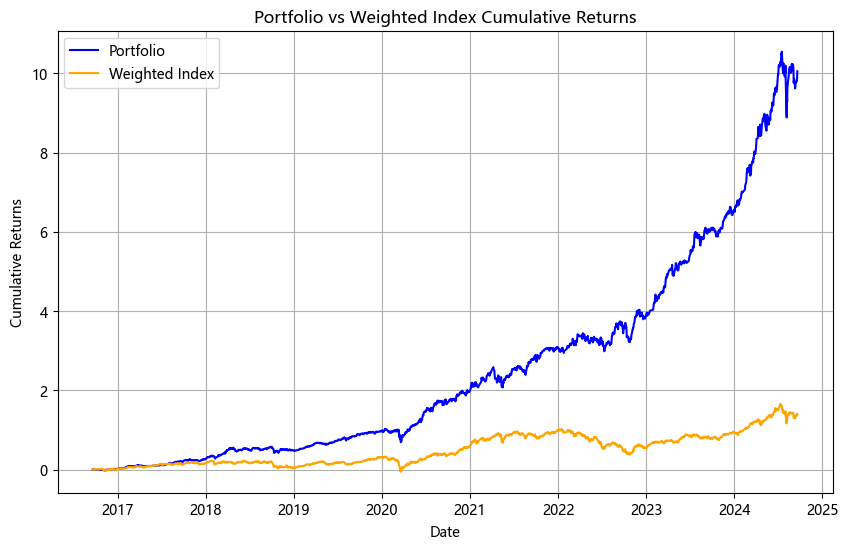

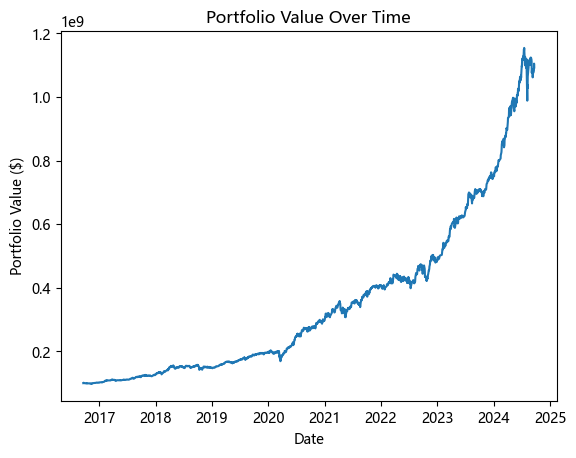

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
else:
    # 计算预期收益率和协方差矩阵，基于价格数据
    mu = expected_returns.mean_historical_return(df_filtered)
    S = risk_models.sample_cov(df_filtered)

    # 使用最大夏普比率进行优化
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()

    # 清理权重并输出
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)

    # 显示投资组合的表现
    ef.portfolio_performance(verbose=True)


# 设置投资组合初始资金
porfolio_val = 100000000  # 假设初始投资资金为100,000,000

# 获取最早的交易日价格
earliest_prices = df_filtered.iloc[0]  # 获取最早交易日的股票价格

# 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
earliest_prices = earliest_prices.dropna()

# 过滤掉权重为零的股票，只保留权重大于零的股票
non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}

# 过滤有效的股票价格，确保权重和价格匹配
valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]

# 使用最早的价格来计算离散分配
try:
    da = DiscreteAllocation(valid_weights, valid_prices, total_portfolio_value=porfolio_val)
    allocation, leftover = da.lp_portfolio()

    # 打印分配结果
    print('Discrete allocation based on earliest prices for non-zero weight stocks:', allocation)
    print('Funds Remaining: $', leftover)

except Exception as e:
    print("在离散分配过程中出错:", e)

# 计算初始持仓成本，使用最早的交易日价格
initial_investment = sum(allocation[stock] * earliest_prices[stock] for stock in allocation) + leftover

# 计算每日的投资组合市值，只选择有分配的股票
# 只选择有分配的股票的价格数据
df_filtered_allocation = df_filtered[list(allocation.keys())]

# 创建一个 DataFrame 来保存每只股票的市值
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)

# 计算每只股票在每天的市值
for stock, shares in allocation.items():
    portfolio_value_per_day[stock] = df_filtered_allocation[stock] * shares

# 计算投资组合每天的总市值
portfolio_value_per_day['Total'] = portfolio_value_per_day.sum(axis=1)

# 计算最终的投资组合市值
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]  # 最后一天的市值

# 计算期间收益和收益率
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 加权指数比较

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.DataFrame({
    'Portfolio Cumulative Returns': portfolio_value_per_day['Cumulative Returns'],
    'Index Cumulative Returns': index_data['Cumulative Returns']
}).dropna()


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='Portfolio', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='Weighted Index', color='orange')
plt.title('Portfolio vs Weighted Index Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'])
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.show()


In [11]:
len(non_zero_weights)

39

C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:9: DtypeWarning: Columns (11,51,52,137,139,142,155,183,219,230,256,257,258,276,362,441,442,460,492,506,584,594,605,607,609,627,628,635,642,643,653,654,660,661,666,672,673,674,675,677,678,679,680,690,691,692,695,708,714,715,719,730,732,752,757,816,818,821,822,825,833,835,842,843,845,846,847,848,849,850,852,853,854,857,858,859,862,863,865,866,867,868,872,873,874,879,909,913,918,935,942,944,948,951,952,953,954,955,956) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('盤後調整價.csv')
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered.fillna(method='ffill', inplace=True)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

以下股票的有效数据点不足，将被排除：
3008    0
dtype: int64
Processing year: 2016


C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2016:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.00966, '1215': 0.00362, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.00234, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.00386, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00865, '1310': 0.0, '1312': 0.00277, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00522, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.00107, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00414, '1418': 0.01327, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.00109, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2017:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.00966, '1215': 0.00362, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.00234, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.00386, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00865, '1310': 0.0, '1312': 0.00277, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.00522, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.00107, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00414, '1418': 0.01327, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.00109, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2018:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.01575, '1110': 0.0, '1201': 0.0, '1203': 0.00061, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.00186, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.01712, '1227': 0.0, '1229': 0.00113, '1231': 0.0, '1232': 0.00221, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.00584, '1414': 0.0052, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.01403, '1439': 0.0, '1440': 0.0, '1441': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2019:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.011, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.02567, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.00404, '1233': 0.00165, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.02136, '1439': 0.01866, '1440': 0.0, '1441': 0.04665, '1442':

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2020:
OrderedDict({'1101': 0.00297, '1102': 0.01514, '1103': 0.01967, '1104': 0.0, '1108': 0.00249, '1109': 0.00048, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.00635, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.00434, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.01898, '1316': 0.0, '1319': 0.0, '1321': 0.00461, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00055, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.00294, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.0, '1437': 0.0, '1438': 0.00633, '1439': 0.0, '1440': 0.0

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2021:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.00307, '1210': 0.0, '1213': 0.02034, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.00868, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0342, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.00651, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.01812, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2022:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.00495, '1231': 0.04696, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.00861, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.02155, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0, '1436': 0.01468, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0, 

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


Optimal weights for year 2023:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.0, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.0, '1235': 0.10947, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.0, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.02113, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.0, '1419': 0.0, '1423': 0.0, '1432': 0.0, '1434': 0.0, '1435': 0.0051, '1436': 0.0, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442': 0.0479, '1443'

C:\Users\asas9\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\asas9\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
C:\Users\asas9\AppData\Local\Temp\ipykernel_22472\2375893700.py:169: FutureWarning: A value is tryi

Optimal weights for year 2024:
OrderedDict({'1101': 0.0, '1102': 0.0, '1103': 0.0, '1104': 0.0, '1108': 0.0, '1109': 0.0, '1110': 0.0, '1201': 0.0, '1203': 0.01713, '1210': 0.0, '1213': 0.0, '1215': 0.0, '1216': 0.0, '1217': 0.0, '1218': 0.0, '1219': 0.0, '1220': 0.0, '1225': 0.0, '1227': 0.0, '1229': 0.0, '1231': 0.0, '1232': 0.0, '1233': 0.0, '1234': 0.00215, '1235': 0.0, '1236': 0.0, '1256': 0.0, '1301': 0.0, '1303': 0.0, '1304': 0.0, '1305': 0.0, '1307': 0.0, '1308': 0.0, '1309': 0.0, '1310': 0.0, '1312': 0.0, '1313': 0.0, '1314': 0.0, '1315': 0.0, '1316': 0.0, '1319': 0.0, '1321': 0.0, '1323': 0.0, '1324': 0.00438, '1325': 0.0, '1326': 0.0, '1337': 0.0, '1338': 0.0, '1339': 0.0, '1340': 0.0, '1341': 0.0, '1342': 0.0, '1402': 0.0, '1409': 0.0, '1410': 0.0, '1413': 0.0, '1414': 0.0, '1416': 0.0, '1417': 0.0, '1418': 0.01259, '1419': 0.0, '1423': 0.01098, '1432': 0.0, '1434': 0.0, '1435': 0.00249, '1436': 0.02426, '1437': 0.0, '1438': 0.0, '1439': 0.0, '1440': 0.0, '1441': 0.0, '1442

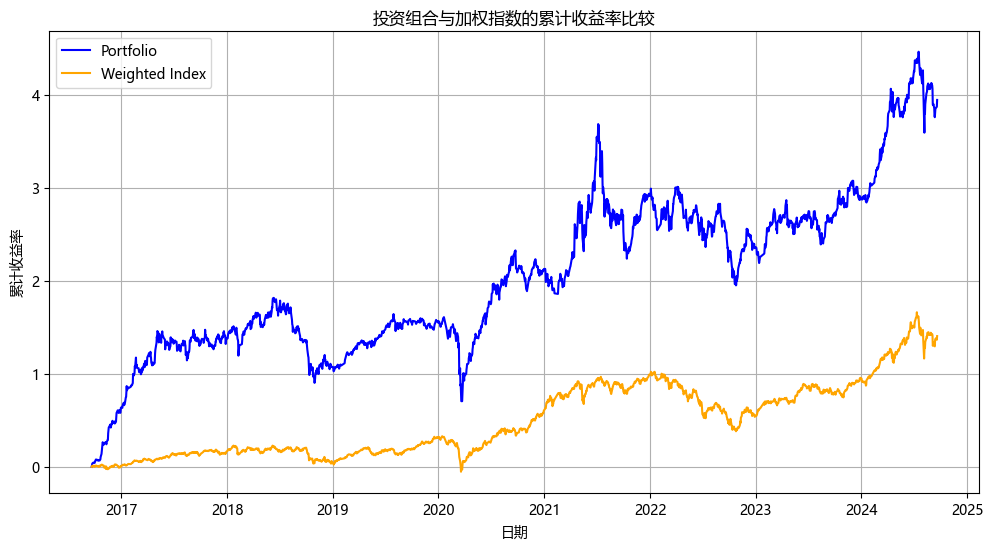

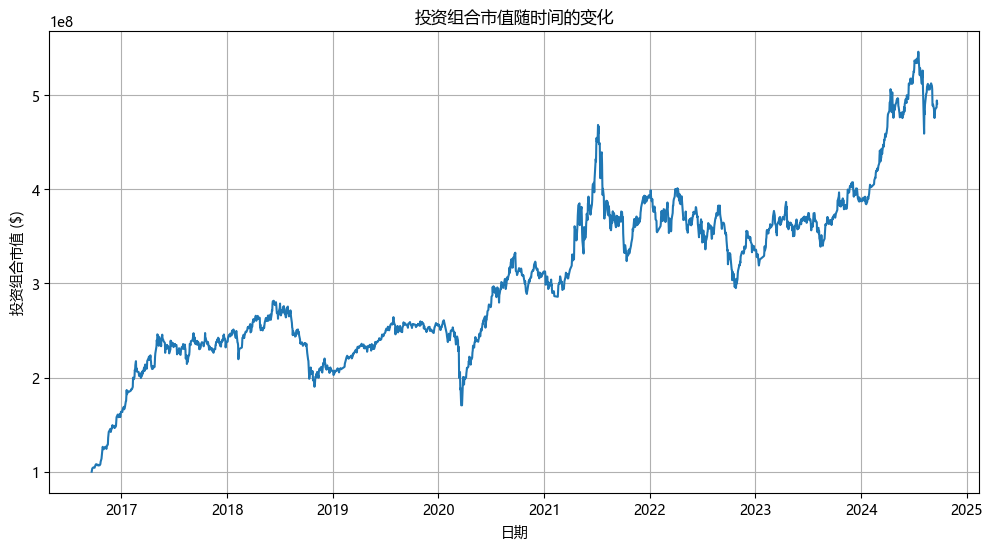

In [39]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 读取数据
df = pd.read_csv('盤後調整價.csv')

# 设置 'Date' 为索引并转换为日期类型
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

# 删除全为 NaN 的行
df.dropna(how='all', inplace=True)

# 将所有列转换为数值类型
df = df.apply(pd.to_numeric, errors='coerce')

# 检查并删除价格为零或负数的值
df[df <= 0] = np.nan

# 移除有效数据点少于阈值的股票
valid_counts = df.notna().sum()
min_valid_data = 10
insufficient_data = valid_counts[valid_counts < min_valid_data]
if not insufficient_data.empty:
    print("以下股票的有效数据点不足，将被排除：")
    print(insufficient_data)
df_filtered = df.drop(columns=insufficient_data.index)

# 前向填充缺失数据
df_filtered.fillna(method='ffill', inplace=True)

# 后向填充，以防前向填充无法填充初始的 NaN 值
df_filtered.fillna(method='bfill', inplace=True)

# 再次检查并删除仍然存在 NaN 的行或列
df_filtered.dropna(axis=0, how='any', inplace=True)
df_filtered.dropna(axis=1, how='any', inplace=True)

# 确保数据中不包含零或负值
if (df_filtered <= 0).any().any():
    print("价格数据中包含零或负值，无法继续运算。")
    exit()

# 设置投资组合初始资金
initial_portfolio_value = 100000000  # 假设初始投资资金为100,000,000
portfolio_value = initial_portfolio_value

# 获取年份列表
years = df_filtered.index.year.unique()
years = sorted(years)

# 初始化持仓
current_allocation = {}
portfolio_value_per_day = pd.DataFrame(index=df_filtered.index)

for i, year in enumerate(years):
    print(f"Processing year: {year}")
    # 获取该年的数据
    year_data = df_filtered[df_filtered.index.year == year]

    # 检查数据是否足够进行优化
    if year_data.shape[0] < 2 or year_data.shape[1] < 2:
        print(f"{year} 年的数据不足，跳过该年。")
        continue

    # 定义用于计算预期收益率和协方差矩阵的历史数据范围
    if i == 0:
        historical_data = year_data
    else:
        # 使用过去一年的数据作为历史数据
        historical_data = df_filtered[df_filtered.index.year == year - 1]

    # 再次检查历史数据是否足够
    if historical_data.shape[0] < 2 or historical_data.shape[1] < 2:
        print(f"{year} 年的历史数据不足，跳过该年。")
        continue

    # 计算预期收益率和协方差矩阵，基于历史数据
    mu = expected_returns.mean_historical_return(historical_data)
    S = risk_models.CovarianceShrinkage(historical_data).ledoit_wolf()

    # 使用最大夏普比率进行优化
    try:
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver='ECOS')
        ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # 添加 L2 正则化
        weights = ef.max_sharpe()
        # 清理权重并输出
        cleaned_weights = ef.clean_weights()
        print(f"Optimal weights for year {year}:")
        print(cleaned_weights)
    except Exception as e:
        print(f"{year} 年求解时出错: {e}")
        continue

    # 获取该年最早的交易日价格
    earliest_prices = year_data.iloc[0]

    # 确保 earliest_prices 是 Series 格式，删除任何 NaN 值
    earliest_prices = earliest_prices.dropna()

    # 过滤掉权重为零的股票，只保留权重大于零的股票
    non_zero_weights = {stock: weight for stock, weight in cleaned_weights.items() if weight > 0}

    # 过滤有效的股票价格，确保权重和价格匹配
    valid_weights = {stock: weight for stock, weight in non_zero_weights.items() if stock in earliest_prices.index}
    valid_prices = earliest_prices[earliest_prices.index.isin(valid_weights.keys())]

    # 计算目标持仓金额
    total_portfolio_value = portfolio_value  # 使用当前的组合价值
    target_allocations = {stock: weight * total_portfolio_value for stock, weight in valid_weights.items()}

    # 计算目标持仓股票数量
    target_shares = {stock: target_allocations[stock] / valid_prices[stock] for stock in valid_weights}

    # 调整持仓
    # 计算需要买入或卖出的股票数量
    adjustments = {}
    for stock in target_shares:
        current_shares = current_allocation.get(stock, 0)
        delta_shares = target_shares[stock] - current_shares
        if delta_shares > 0:
            print(f"Year {year}: Need to buy {delta_shares:.2f} shares of {stock}")
        elif delta_shares < 0:
            print(f"Year {year}: Need to sell {-delta_shares:.2f} shares of {stock}")
        adjustments[stock] = delta_shares

    # 更新 current_allocation
    for stock in target_shares:
        current_allocation[stock] = target_shares[stock]

    # 更新 portfolio_value
    # 假设没有交易成本
    # 执行调整
    for stock, delta_shares in adjustments.items():
        # Adjust the cash position
        cash_adjustment = -delta_shares * valid_prices[stock]
        portfolio_value += cash_adjustment

    # 移除已经不再持有的股票
    stocks_to_remove = [stock for stock in current_allocation if stock not in target_shares]
    for stock in stocks_to_remove:
        # 卖出全部持仓
        sell_shares = current_allocation[stock]
        sell_price = valid_prices.get(stock, year_data.iloc[0].get(stock))
        if sell_price is not None:
            portfolio_value += sell_shares * sell_price
            print(f"Year {year}: Need to sell all shares of {stock} ({sell_shares:.2f} shares)")
        del current_allocation[stock]

    # 计算该年的每日投资组合市值
    # 只选择有持仓的股票
    held_stocks = list(current_allocation.keys())
    year_prices = year_data[held_stocks]

    # 计算每日的投资组合市值
    daily_portfolio_value = (year_prices * pd.Series(current_allocation)).sum(axis=1)

    # 更新 portfolio_value_per_day
    portfolio_value_per_day.loc[year_data.index, 'Total'] = daily_portfolio_value

    # 更新 portfolio_value 为该年最后一天的投资组合市值
    portfolio_value = daily_portfolio_value.iloc[-1]

# 填充缺失的投资组合市值（如果有）
portfolio_value_per_day['Total'].fillna(method='ffill', inplace=True)

# 计算期间收益和收益率
initial_investment = initial_portfolio_value
final_portfolio_value = portfolio_value_per_day['Total'].iloc[-1]
portfolio_return = final_portfolio_value - initial_investment  # 期间收益
portfolio_return_rate = portfolio_return / initial_investment  # 期间收益率

# 输出结果
print("初始投资: $", initial_investment)
print("最终投资组合市值: $", final_portfolio_value)
print("期间收益: $", portfolio_return)
print("期间收益率: {:.2%}".format(portfolio_return_rate))

# 计算投资组合的每日收益率
portfolio_value_per_day['Returns'] = portfolio_value_per_day['Total'].pct_change().fillna(0)

# 计算投资组合的累计收益率
portfolio_value_per_day['Cumulative Returns'] = (1 + portfolio_value_per_day['Returns']).cumprod() - 1

# 下载指数数据
index_ticker = "^TWII"  # 替换成你需要的加权指数代码
index_data = yf.download(index_ticker, start=df_filtered.index[0], end=df_filtered.index[-1])

# 计算加权指数的每日收益率
index_data['Returns'] = index_data['Adj Close'].pct_change().fillna(0)

# 计算加权指数的累计收益率
index_data['Cumulative Returns'] = (1 + index_data['Returns']).cumprod() - 1

# 合并投资组合和加权指数的累计收益率，确保日期对齐
comparison_data = pd.DataFrame({
    'Portfolio Cumulative Returns': portfolio_value_per_day['Cumulative Returns'],
    'Index Cumulative Returns': index_data['Cumulative Returns']
}).dropna()

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 绘制对比图
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data['Portfolio Cumulative Returns'], label='Portfolio', color='blue')
plt.plot(comparison_data.index, comparison_data['Index Cumulative Returns'], label='Weighted Index', color='orange')
plt.title('投资组合与加权指数的累计收益率比较')
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True)
plt.show()

# 可视化投资组合市值随时间的变化
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_per_day.index, portfolio_value_per_day['Total'])
plt.title('投资组合市值随时间的变化')
plt.xlabel('日期')
plt.ylabel('投资组合市值 ($)')
plt.grid(True)
plt.show()
